In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with uproot.open("/data/QE_MC20_v4_r13167_HWWlvlv.root") as file:
    print(file.keys())
    branches = file["truth;1"]
    print(branches.keys())
    data = branches.arrays(library="np")

['truth;1']
['higgs_pt', 'higgs_eta', 'higgs_phi', 'higgs_m', 'higgs_pdgId', 'w_pos_pt', 'w_pos_eta', 'w_pos_phi', 'w_pos_m', 'w_pos_pdgId', 'lep_pos_pt', 'lep_pos_eta', 'lep_pos_phi', 'lep_pos_pdgId', 'nu_pt', 'nu_eta', 'nu_phi', 'nu_pdgId', 'w_neg_pt', 'w_neg_eta', 'w_neg_phi', 'w_neg_m', 'w_neg_pdgId', 'lep_neg_pt', 'lep_neg_eta', 'lep_neg_phi', 'lep_neg_pdgId', 'anti_nu_pt', 'anti_nu_eta', 'anti_nu_phi', 'anti_nu_pdgId']


In [3]:
lep_pos_pt = data["lep_pos_pt"]
lep_pos_eta = data["lep_pos_eta"]
lep_pos_phi = data["lep_pos_phi"]
lep_pos_m = np.zeros_like(lep_pos_pt)
nu_pt = data["nu_pt"]
nu_eta = data["nu_eta"]
nu_phi = data["nu_phi"]
nu_m = np.zeros_like(nu_pt)

w_pos_m = data["w_pos_m"]

lep_neg_pt = data["lep_neg_pt"]
lep_neg_eta = data["lep_neg_eta"]
lep_neg_phi = data["lep_neg_phi"]
lep_neg_m = np.zeros_like(lep_neg_pt)
anti_nu_pt = data["anti_nu_pt"]
anti_nu_eta = data["anti_nu_eta"]
anti_nu_phi = data["anti_nu_phi"]
anti_nu_m = np.zeros_like(anti_nu_pt)

w_neg_m = data["w_neg_m"]

In [4]:
lep_pos_pdgid = branches["lep_pos_pdgId"].array()
print(np.unique(lep_pos_pdgid))
pos_el = (lep_pos_pdgid == -11)
pos_mu = (lep_pos_pdgid == -13)

lep_neg_pdgid = branches["lep_neg_pdgId"].array()
print(np.unique(lep_neg_pdgid))
neg_el = (lep_neg_pdgid == 11)
neg_mu = (lep_neg_pdgid == 13)

[-15, -13, -11]
[11, 13, 15]


In [5]:
el_eta = np.select([pos_el, neg_el], [lep_pos_eta, lep_neg_eta], np.nan)
mu_eta = np.select([pos_mu, neg_mu], [lep_pos_eta, lep_neg_eta], np.nan)
notau_el_eta = el_eta[np.isfinite(el_eta)]
notau_mu_eta = mu_eta[np.isfinite(mu_eta)]
el_selections = np.abs(notau_el_eta) < 2.47
mu_selsctions = np.abs(notau_mu_eta) < 2.5
sel_el_eta = notau_el_eta[el_selections]
sel_mu_eta = notau_mu_eta[mu_selsctions]

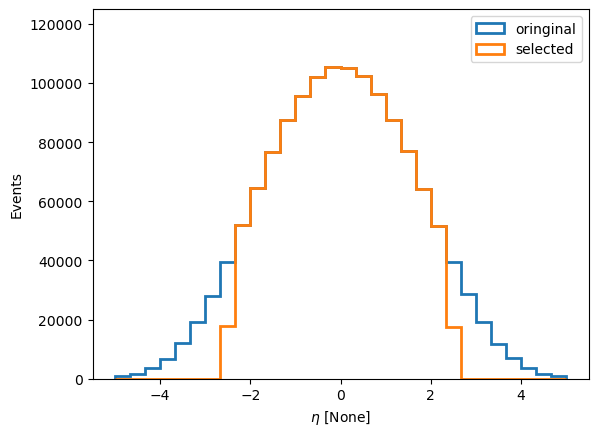

In [6]:
bins_edges = np.linspace(-5, 5, 31)
plt.hist(notau_el_eta, bins=bins_edges, histtype="step", linewidth=2.0, label="oringinal", density=False)
plt.hist(sel_el_eta, bins=bins_edges, histtype="step", linewidth=2.0, label="selected", density=False)
plt.ylim(0, 125_000)
plt.xlabel(r"$\eta$ [None]")
plt.ylabel("Events")
plt.legend()
plt.show()

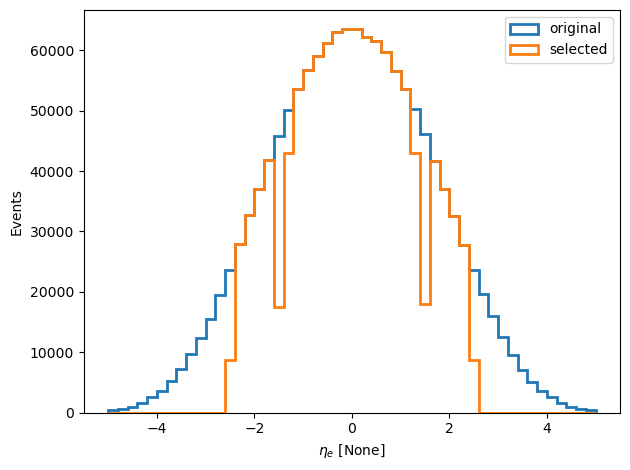

In [7]:
gap_lo, gap_hi = 1.37, 1.52
acc = 2.47

# original：不加任何 cut 的電子 η
original_eta = notau_el_eta   

# selected：同時套接受度與 gap 排除
mask_selected = (np.abs(original_eta) < acc) & ~(  (np.abs(original_eta) >= gap_lo) & (np.abs(original_eta) <= gap_hi))
selected_eta = original_eta[mask_selected]

bins_edges = np.linspace(-5, 5, 51)

plt.hist(original_eta, bins=bins_edges, histtype="step", linewidth=2.0, label="original", density=False)
plt.hist(selected_eta, bins=bins_edges, histtype="step", linewidth=2.0, label="selected", density=False)
plt.xlabel(r"$\eta_e$ [None]")
plt.ylabel("Events")
plt.legend()
plt.tight_layout()
plt.show()
